# Stack Overflow Survey 2020 - Data Analysis


## Business Understanding

Stack Overflow 2020 Survey is the largest and most comprehensive Survey of Software developers on earth. Therefore, is a good source of information to answer questions related to the Software Development market.

The target of this analysis is to answer three questions related to this Business:
- What are the top 5 languages considering community size?
- What is the developer average income for each language? How is it related with the community size?
- What are the top 10 languages with higher incomes devs with one or fewer years of experience?

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Import Data

In [4]:
df=pd.read_csv('data/survey_results_public.csv')

### Check Data

Let's see how the table is configured and what are the columns that we are interested in.
Since it's necessary to see the whole picture of the table, it's needed to change Pandas configurations for Display, showing all the columns.

In [6]:
pd.set_option("display.max_columns", 200)
df.head(10)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

For the questions that must be answered with this table, we will need to use the following columns:<br>
<ol>
<li>ConvertedComp - To check the income of each dev in USD</li>
<li>LanguageWorkedWith - To know what language does the dev work with</li>
<li>YearsCodePro - To know how their coding experience relate with their income</li>
</ol>

In [7]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


With <code>df.describe()</code> above it's possible to see what columns in the table are pure numeric, and also that some numeric columns have flaws.
<br><br>
For instance, the 'Age' column has a minimum value of '1' and a maximum '279'. Unless there is a new record for human longevity of a human being 279 years old and a 1 year baby prodigy that can code, looks like some respondents might mispelled their answers.<br><br>
Also 'WorkWeekHrs' column has a maximum of '475'. The maximum value possible is 7*24 = 168. Looks like this column also have flaws.<br><br>
Since any of these columns will be used or are related with the columns that will be analyzed, there is no need to take any action.

## Data Wrangling
### Implement Functions
In order to extract the answers for the posted questions in the beggining of this Notebook, some Data Wrangling will be needed.
#### Auxiliary Functions
It's always a good idea to break complex code into blocks of simpler functions. Before implementing what I call "Analysis Functions", that is, functions that will output the needed answers, hereunder are written the functions that will aid them to do so.<br><br>
Quick note: Out of the three columns that were highlighted as necessary for the analysis, the 'LanguageWorkedWith' column does not have the proper format in order to be analyzed. Each cell is formated as a string with all the languages the dev works with separated by semicolon (e.g. "C; Julia; Python"). In order to analyze this data, it's needed to make transform this data to a wide-format. To do so the <code>create_language_columns(df)</code> function is implemented.

In [ ]:
languages = set(';'.join(df['LanguageWorkedWith'].dropna()).split(';'))

In [3]:
def create_language_columns(df):
    '''
    Create column for each of the available languages in the dataset with a Boolean value:
        True -> If the language is contained in the LanguageWorkedWith column.
        False -> otherwise.

    Input: Pandas dataframe (df)
    Output: none
    '''
    for language in languages:
        df.loc[:,language] = df['LanguageWorkedWith'].apply(lambda x: language in x if pd.notnull(x) else False)

In [4]:
def isNaN(x):
    '''
    Checks if the value is NaN.

    Input: x - value to be checked.
    Output: True if NaN, False otherwise.
    '''
    return x!=x

To facilitate the analysis about the Professional Experience, instead of analyzing the data as discrete, it's better to use ranges of experience.

In [5]:
def proExpRange(x):
    '''
    Defines ProExpRange based on cell value.
    
    Input: Number or string.
    Output: ProExpRange classification.
    '''
    if isNaN(x):
        return np.nan
    elif x == 'More than 50 years':
        return '4) 7 years or more'
    elif x == 'Less than 1 year':
        return '1) 1 year or less'
    elif int(x)==1:
        return '1) 1 year or less'
    elif 1<int(x)<=4:
        return '2) 2 to 4 years'
    elif int(x)<=7:
        return '3) 5 to 7 years'
    else:
        return '4) 7 years or more'

In [6]:
def create_proexprange_column(df):
    '''
    Create a column with range classification based on Professional Coding Experience in years.
    The column can have one of the following values:
        -> math.nan
        -> '1) Less than 1 year'
        -> '2) 1 to 3 years'
        -> '3) 4 to 6 years'
        -> '4) 6 to 9 years'
        -> '5) 10 or more years'

    Input: Pandas dataframe (df)
    Output: None.
    '''
    df.loc[:,'ProExpRange'] = df['YearsCodePro'].apply(proExpRange)

In [10]:
def annotate_df(df):
    '''
    Annotates a plot of a Dataframe.

    Input: df to be annotated
    Output: none
    '''
    l=['Objective-C','Haskell','Assembly','C']
    
    ax.annotate(
        text=row.values[0],
        xy=(row.values[2],row.values[1]),
        xytext=(-2,-12) if row.values[0] in l else (-2,5),
        textcoords='offset points',
        size=10,
        family='monospace'
        )

In [12]:
def create_col_d(df, col1, col2):
    '''
    Creates 'd' column which is the normalized distance between a point in a 2 dimensional space and the axes center.

    Input:
        df: desired dataframe to create column 'd'
        col1: column with 'x' values (str)
        col2: column with 'y' values (str)
    
    Output: None.
    '''

    df.loc[:,'d']=np.sqrt(normalize_data(df,col1)**2 + normalize_data(df,col2)**2)/np.sqrt(2)

In [11]:
def normalize_data(df,col):
    '''
    Normalize a column 'col'.

    Input:
        df: dataframe that contains 'col'
        col: desired column to be normalized
    
    Output: normalized column.
    '''
    maximum = df[col].max()
    minimum = df[col].min()
    normalized = (df[col]-minimum)/(maximum-minimum)

    return normalized

#### Analysis Functions
Finally lets implement the functions that will return dataframes that will be used for analysis. They will use the Auxiliary Functions implemented before in order to achieve our goals.

In [9]:
def devs_per_lang(df):
    '''
    Creates a dataframe with devs per language
    
    Input: Pandas dataframe (df)
    Output: Pandas dataframe with language, devs_count
    '''
    devs_count=[]
    
    for language in languages:
        devs=df[language].sum()
        devs_count.append(devs)

    data={'lang':list(languages),'devs_count':devs_count}
    
    return pd.DataFrame(data)

In [7]:
def devs_avg_income_per_lang(df):
    '''
    Creates a dataframe with average salaries per language
    
    Input: Pandas dataframe (df)
    Output: Pandas dataframe with language, devs_count, avg_income 
    '''
    devs_count=[]
    avg_income=[]
    for language in languages:
        devs=df[df[language]==True]['ConvertedComp'].count()
        devs_count.append(devs)

        avg=df[df[language]==True]['ConvertedComp'].mean()
        avg_income.append(avg)

    data={'lang':list(languages),'devs_count':devs_count,'avg_income':avg_income}
    
    return pd.DataFrame(data)

In [8]:
def devs_avg_income_per_lang_and_exp(df):
    '''
    Creates a dataframe with average salaries per language and experience level
    
    Input: Pandas dataframe (df)
    Output: Pandas dataframe with language, devs_count, avg_income 
    '''
    langs=[]
    ranges=[]
    devs_count=[]
    avg_income=[]
    pro_exp_ranges=set(df['ProExpRange'])

    for language in languages:
        for pro_range in pro_exp_ranges:
            langs.append(language)
            ranges.append(pro_range)
            devs=df[(df[language] == True) & (df['ProExpRange'] == pro_range)]['ConvertedComp'].count()
            devs_count.append(devs)
            avg=df[(df[language] == True) & (df['ProExpRange'] == pro_range)]['ConvertedComp'].mean()
            avg_income.append(avg)

    data={'lang':langs,'pro_exp_range':ranges,'devs_count':devs_count,'avg_income':avg_income}
    
    return pd.DataFrame(data)

## What are the top 5 languages considering community size?

In [13]:
create_language_columns(df)
create_proexprange_column(df)

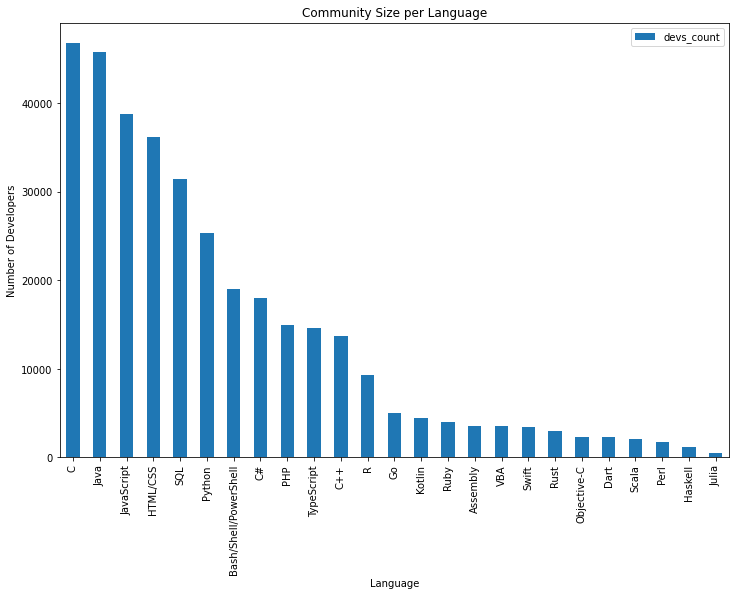

In [14]:
df_devs = devs_per_lang(df).sort_values('devs_count', ascending=False)
df_devs.plot(
    kind='bar', 
    x='lang',
    xlabel='Language',
    figsize=[12,8],
    ylabel='Number of Developers',
    title='Community Size per Language'
    )

The top 5 languages by community size are:
- C
- Java
- JavaScript
- HTML/CSS
- SQL

## What is the developer average income for each language? How is it related with the community size?

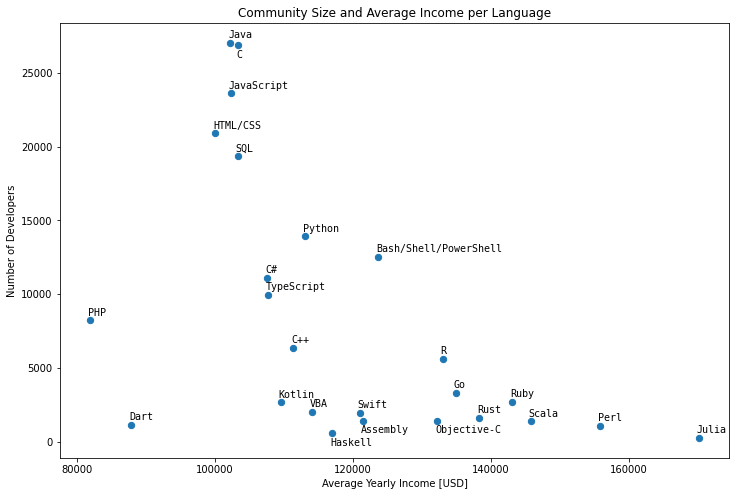

In [15]:
df_lang = devs_avg_income_per_lang(df)
create_col_d(df_lang, 'avg_income', 'devs_count')

ax=df_lang.plot(
    x='avg_income',
    y='devs_count', 
    kind='scatter', 
    s=40,
    figsize=[12,8],
    xlabel='Average Yearly Income [USD]',
    ylabel='Number of Developers',
    title='Community Size and Average Income per Language'
    )

df_lang.apply(annotate_df,axis=1)

According to the above figure, it's possible to see that the bigger the community, the lower the average yearly income. This is natural since it follows the Supply & Demand Law. <br><br>
It could be clustered in 3 groups:
- Big Community & "Low" income: C, Java and JavaScript;
- Medium Community & "Average" income: Bash/Shell/PowerShell, Python & C#;
- Small Community & "High" income: Julia, Perl, Scala.


## What are the top 10 languages with higher incomes devs with one or fewer years of experience?

In [16]:
set(df['ProExpRange'])

{'1) 1 year or less',
 '2) 2 to 4 years',
 '3) 5 to 7 years',
 '4) 7 years or more',
 nan}

In [17]:
df_proexp=devs_avg_income_per_lang_and_exp(df)
pivot=pd.pivot_table(df_proexp,values='avg_income',columns='pro_exp_range',index='lang')
top10_rookie=pivot.sort_values('1) 1 year or less', ascending=False).head(10)

C:\Users\hcrle\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\hcrle\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


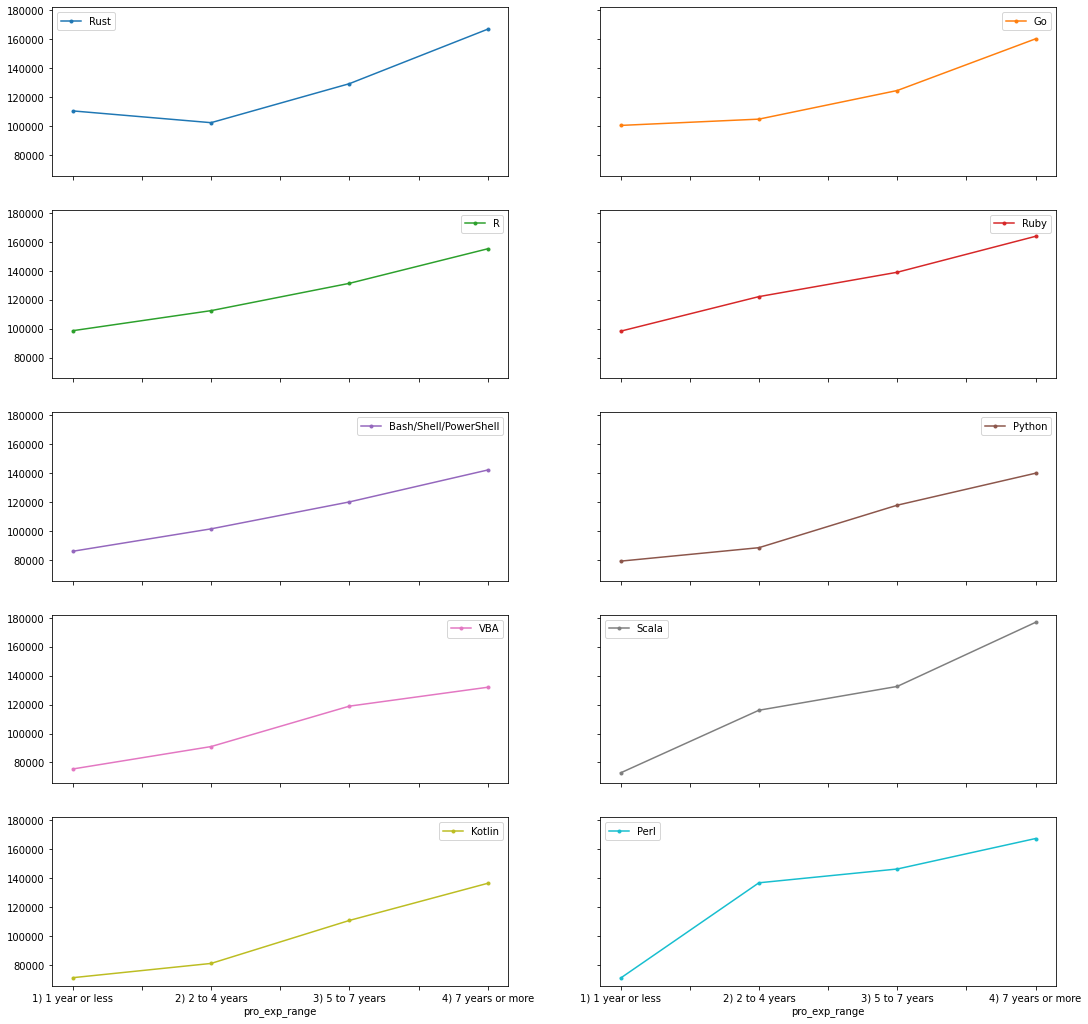

In [18]:
top10_rookie.T.plot(subplots=True, layout=(5,2), figsize=(18,18), style='.-', sharex=True, sharey=True)

The languages that are have more attractive salaries to little experienced developers are usually the ones that have smaller communities, for instance, Go and Rust. Once again, it makes sense, since the lower supply of developers necessarily increase the salary offer to fulfill the demand. The Top 3 companies pay yearly more than 100,000 USD on average for such developers.